In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('IMDB_dataset.csv')

In [3]:
#prints the length of the dataset
print(dataset.shape)

(50000, 2)


In [4]:
#it prints top 5 rows of the dataset
dataset.head()  

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#describes the dataset 
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [6]:
dataset=dataset.iloc[0:5000,:]

In [7]:
#describes the dataset by making groups as per rating 
dataset.groupby('sentiment').count()

,review
sentiment,
negative,2532
positive,2468


In [8]:
# checking if there is any null data or not
dataset.isnull().any().any()

False

In [9]:
#Making a new column to detect how long the text messages are:
dataset['length'] = dataset['review'].apply(len)
dataset.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


<AxesSubplot:ylabel='Frequency'>

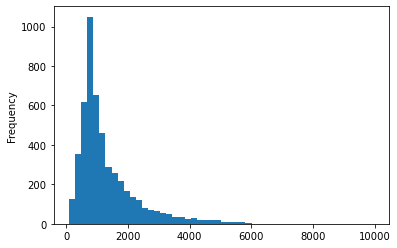

In [10]:
#graph to represent the frequency of data with the given length in the dataset 
dataset['length'].plot(bins=50, kind='hist')

In [11]:
#desribes the length column of the dataset 
dataset.length.describe()

count    5000.000000
mean     1310.303200
std       984.782125
min        80.000000
25%       698.750000
50%       965.000000
75%      1616.250000
max      9951.000000
Name: length, dtype: float64

In [12]:
# Importing the dataset
data = pd.read_csv('IMDB_dataset.csv')

In [13]:
data.shape

(50000, 2)

In [14]:
data=data.iloc[0:5000,:]

In [15]:
#describes the dataset by making groups as per rating 
dataset.groupby('sentiment').count()

,review,length
sentiment,,
negative,2532,2532
positive,2468,2468


In [16]:
#cleaning the texts and stemming the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/shilpi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from tqdm import tqdm

In [18]:
data.shape[0]

5000

In [102]:
corpus=[]
for i in tqdm(range(0,data.shape[0])):
    review = re.sub('[^a-zA-Z]', ' ', data['review'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

100%|██████████| 5000/5000 [04:51<00:00, 17.17it/s]


In [103]:
nn=len(corpus)
nn

5000

In [115]:
import pickle
with open('corpusfile', 'wb') as fp:
    pickle.dump(corpus, fp)

In [116]:
with open ('corpusfile', 'rb') as fp:
    loaded_corpus = pickle.load(fp)

In [117]:
type(loaded_corpus)

list

In [118]:
# creating the Bag of words Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(loaded_corpus).toarray()
y=data.iloc[:,1].values

In [119]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Feature Scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
def convertReviewToArray(rev):
    review = re.sub('[^a-zA-Z]', ' ', rev)
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    temp=corpus[0:nn]
    temp.append(review)
    cv=CountVectorizer(max_features=1500)
    corp=cv.fit_transform(temp).toarray()
    corp=scaler.transform(corp)
    size=len(temp)
    review=corp[size-1:size]
    temp=temp[0:size-1]
    return review

In [139]:
res=convertReviewToArray("bad")

In [140]:
res=cksvm.predict(res)
print(res)

['negative']


In [141]:
#make a list of accuracies to store all the accuracy for different algorithm
accuracies={}
precision={}
recall={}
f_score={}

In [142]:
#MODEL-1
# Fitting Random Forest classifier with 100 trees to the Training set
X_train1=X_train
y_train1=y_train
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train1, y_train1)

X_test1=X_test
y_pred1 = classifier.predict(X_test1)

print("Training Accuracy :", classifier.score(X_train1, y_train1))
print("Testing Accuracy :", classifier.score(X_test1, y_test))

accuracies['Random Forest']=classifier.score(X_test1, y_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

Training Accuracy : 1.0
Testing Accuracy : 0.826
[[437  88]
 [ 86 389]]


In [143]:
#TN FP
#FN TP

accuracy1=(cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[0][1]+cm1[1][0]+cm1[1][1])
print(accuracy1)

precision1=(cm1[1][1])/(cm1[0][1]+cm1[1][1])
precision['Random Forest']=precision1
print(precision1)

recall1=(cm1[1][1])/(cm1[1][0]+cm1[1][1])
recall['Random Forest']=recall1
print(recall1)

f_score1=(2*precision1*recall1)/(precision1+recall1)
f_score['Random Forest']=f_score1
print(f_score1)

0.826
0.8155136268343816
0.8189473684210526
0.8172268907563025


In [144]:
#Model-2
#FITTING LOGISTIC REGRESSION CLASSIFIER TO OUR TRAINING SET
X_train2=X_train
y_train2=y_train
X_test2=X_test

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train2, y_train2)

# Predicting the Test set results
y_pred2 = classifier_lr.predict(X_test2)

print("Training Accuracy :", classifier_lr.score(X_train2, y_train2))
print("Testing Accuracy :", classifier_lr.score(X_test2, y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

Training Accuracy : 1.0
Testing Accuracy : 0.78
[[414 111]
 [109 366]]


/home/shilpi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
#TN FP
#FN TP

accuracy2=(cm2[0][0]+cm2[1][1])/(cm2[0][0]+cm2[0][1]+cm2[1][0]+cm2[1][1])
print(accuracy2)
accuracies['Logistic Regression']=accuracy2

precision2=(cm2[1][1])/(cm2[0][1]+cm2[1][1])
print(precision2)
precision['Logistic Regression']=precision2

recall2=(cm2[1][1])/(cm2[1][0]+cm2[1][1])
print(recall2)
recall['Logistic Regression']=recall2

f_score2=(2*precision2*recall2)/(precision2+recall2)
print(f_score2)
f_score['Logistic Regression']=f_score2

0.78
0.7672955974842768
0.7705263157894737
0.7689075630252101


100%|██████████| 19/19 [05:51<00:00, 18.49s/it]


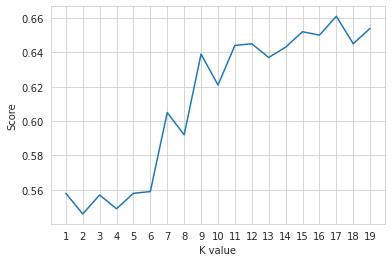

Training Accuracy : 0.67725
Testing Accuracy : 0.558
[[426  99]
 [343 132]]


In [146]:
#Model-3
#FITTING K_NEAREST_NEIGHBORS MODEL TO OUR TRAINING SET
X_train3=X_train
y_train3=y_train
X_test3=X_test

from sklearn.neighbors import KNeighborsClassifier
# try to find best k value
scoreList = []
for i in tqdm(range(1,20)):
    knn3 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn3.fit(X_train3, y_train3)
    scoreList.append(knn3.score(X_test3, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

# Training the K-NN model on the Training set
cknn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
cknn.fit(X_train3, y_train3)

# Predicting the Test set results
y_pred3 = cknn.predict(X_test3)

print("Training Accuracy :", cknn.score(X_train3, y_train3))
print("Testing Accuracy :", cknn.score(X_test3, y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

In [147]:
accuracy3=(cm3[0][0]+cm3[1][1])/(cm3[0][0]+cm3[0][1]+cm3[1][0]+cm3[1][1])
print(accuracy3)
accuracies['k_nearest_neighbors']=accuracy3

precision3=(cm3[1][1])/(cm3[0][1]+cm3[1][1])
print(precision3)
precision['k_nearest_neighbors']=precision3

recall3=(cm3[1][1])/(cm3[1][0]+cm3[1][1])
print(recall3)
recall['k_nearest_neighbors']=recall3

f_score3=(2*precision3*recall3)/(precision3+recall3)
print(f_score3)
f_score['k_nearest_neighbors']=f_score3

0.558
0.5714285714285714
0.27789473684210525
0.37393767705382436


In [148]:
#Model-4
#FITTING SUPPORT VECTOR MACHINE CLASSIFIER TO OUR TRAINING SET 
X_train4=X_train
y_train4=y_train
X_test4=X_test

# Training the SVM model on the Training set
from sklearn.svm import SVC
csvm = SVC(kernel = 'linear', random_state = 0)
csvm.fit(X_train4, y_train4)

# Predicting the Test set results
y_pred4 = csvm.predict(X_test4)

print("Training Accuracy :", csvm.score(X_train4, y_train4))
print("Testing Accuracy :", csvm.score(X_test4, y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

Training Accuracy : 1.0
Testing Accuracy : 0.764
[[408 117]
 [119 356]]


In [149]:
accuracy4=(cm4[0][0]+cm4[1][1])/(cm4[0][0]+cm4[0][1]+cm4[1][0]+cm4[1][1])
print(accuracy4)
accuracies['SVM']=accuracy4

precision4=(cm4[1][1])/(cm4[0][1]+cm4[1][1])
print(precision4)
precision['SVM']=precision4

recall4=(cm4[1][1])/(cm4[1][0]+cm4[1][1])
print(recall4)
recall['SVM']=recall4

f_score4=(2*precision4*recall4)/(precision4+recall4)
print(f_score4)
f_score['SVM']=f_score4

0.764
0.7526427061310782
0.7494736842105263
0.751054852320675


In [150]:
#Model-5
#FITTING KERNEL SVM TO OUR TRAINING SET 
X_train5=X_train
y_train5=y_train
X_test5=X_test

# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
cksvm = SVC(kernel = 'rbf', random_state = 0)
cksvm.fit(X_train5, y_train5)

# Predicting the Test set results
y_pred5 = cksvm.predict(X_test5)

print("Training Accuracy :", cksvm.score(X_train5, y_train5))
print("Testing Accuracy :", cksvm.score(X_test5, y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

Training Accuracy : 0.977
Testing Accuracy : 0.829
[[419 106]
 [ 65 410]]


In [151]:
accuracy5=(cm5[0][0]+cm5[1][1])/(cm5[0][0]+cm5[0][1]+cm5[1][0]+cm5[1][1])
print(accuracy5)
accuracies['Kernel SVM']=accuracy5

precision5=(cm5[1][1])/(cm5[0][1]+cm5[1][1])
print(precision5)
precision['Kernel SVM']=precision5

recall5=(cm5[1][1])/(cm5[1][0]+cm5[1][1])
print(recall5)
recall['Kernel SVM']=recall5

f_score5=(2*precision5*recall5)/(precision5+recall5)
print(f_score5)
f_score['Kernel SVM']=f_score5

0.829
0.7945736434108527
0.8631578947368421
0.8274470232088799


In [152]:
#Model-6
#FITTING NAIVE BAYES TO TRAINING SET 

X_train6=X_train
y_train6=y_train
X_test6=X_test

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
cnb = GaussianNB()
cnb.fit(X_train6, y_train6)

# Predicting the Test set results
y_pred6 = cnb.predict(X_test6)

print("Training Accuracy :", cnb.score(X_train6, y_train6))
print("Testing Accuracy :", cnb.score(X_test6, y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)

Training Accuracy : 0.824
Testing Accuracy : 0.769
[[417 108]
 [123 352]]


In [153]:
accuracy6=(cm6[0][0]+cm6[1][1])/(cm6[0][0]+cm6[0][1]+cm6[1][0]+cm6[1][1])
print(accuracy6)
accuracies['Naive Bayes']=accuracy6

precision6=(cm6[1][1])/(cm6[0][1]+cm6[1][1])
print(precision6)
precision['Naive Bayes']=precision6

recall6=(cm6[1][1])/(cm6[1][0]+cm6[1][1])
print(recall6)
recall['Naive Bayes']=recall6

f_score6=(2*precision6*recall6)/(precision6+recall6)
print(f_score6)
f_score['Naive Bayes']=f_score6

0.769
0.7652173913043478
0.7410526315789474
0.7529411764705883


In [154]:
#Model-7
#FITTING DECISION TREE CLASSIFIER 
X_train7=X_train
y_train7=y_train
X_test7=X_test

# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
cdt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
cdt.fit(X_train7, y_train7)

# Predicting the Test set results
y_pred7 = cdt.predict(X_test7)

print("Training Accuracy :", cdt.score(X_train7, y_train7))
print("Testing Accuracy :", cdt.score(X_test7, y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)

Training Accuracy : 1.0
Testing Accuracy : 0.693
[[368 157]
 [150 325]]


In [155]:
accuracy7=(cm7[0][0]+cm7[1][1])/(cm7[0][0]+cm7[0][1]+cm7[1][0]+cm7[1][1])
print(accuracy7)
accuracies['decision tree']=accuracy7

precision7=(cm7[1][1])/(cm7[0][1]+cm7[1][1])
print(precision7)
precision['decision tree']=precision7

recall7=(cm7[1][1])/(cm7[1][0]+cm7[1][1])
print(recall7)
recall['decision tree']=recall7

f_score7=(2*precision7*recall7)/(precision7+recall7)
print(f_score7)
f_score['decision tree']=f_score7

0.693
0.6742738589211619
0.6842105263157895
0.6792058516196448


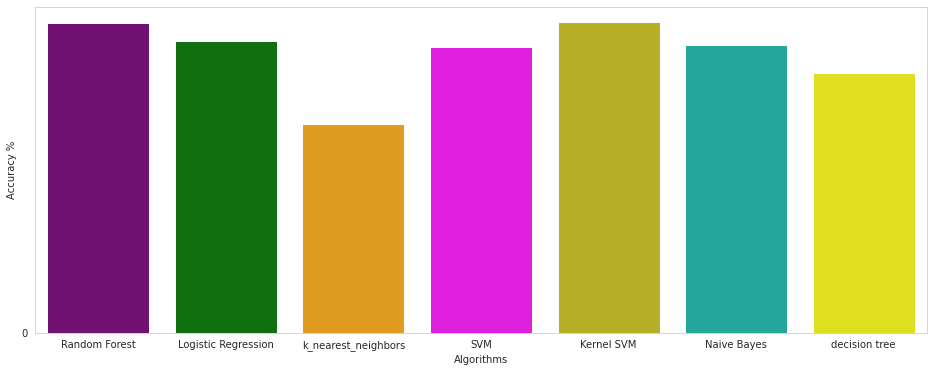

In [156]:
#Comparing models
#comparing accuracy of different models
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

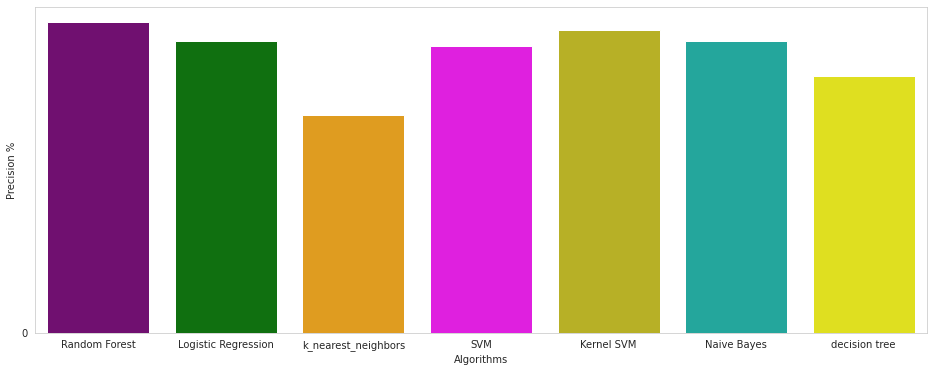

In [157]:
#comparing precision of different models

colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Precision %")
plt.xlabel("Algorithms")
sns.barplot(x=list(precision.keys()), y=list(precision.values()), palette=colors)
plt.show()

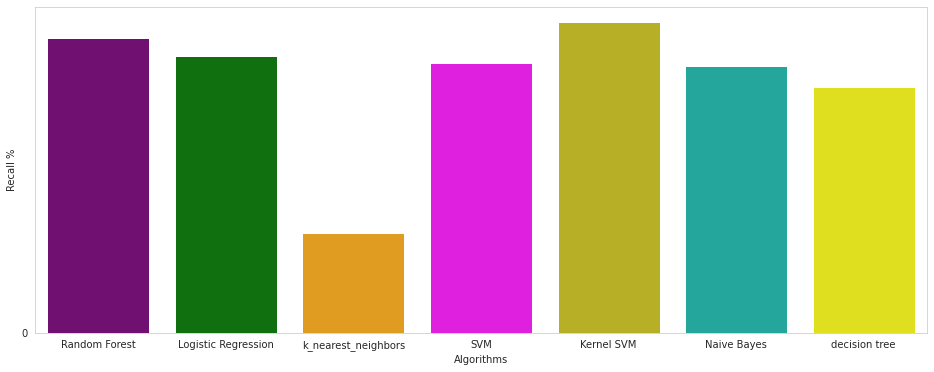

In [158]:
#comparing recall of different models
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
sns.barplot(x=list(recall.keys()), y=list(recall.values()), palette=colors)
plt.show()

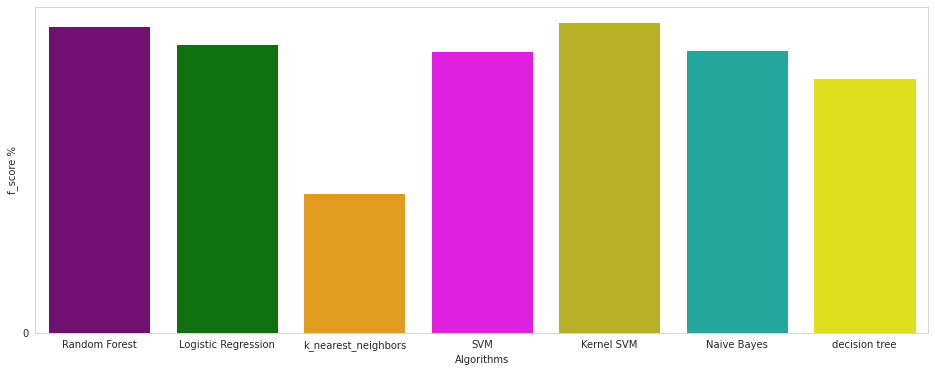

In [159]:
#comparing f_score of different models
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","yellow"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("f_score %")
plt.xlabel("Algorithms")
sns.barplot(x=list(f_score.keys()), y=list(f_score.values()), palette=colors)
plt.show()

In [160]:
#comparing confusion matrix of different models
print("Random Forest\n",cm1)
print("Logistic Regression\n",cm2)
print("KNN\n",cm3)
print("SVM\n",cm4)
print("kSVM\n",cm5)
print("Naive Bayes",cm6)
print("Decision tree\n",cm7)


Random Forest
 [[437  88]
 [ 86 389]]
Logistic Regression
 [[414 111]
 [109 366]]
KNN
 [[426  99]
 [343 132]]
SVM
 [[408 117]
 [119 356]]
kSVM
 [[419 106]
 [ 65 410]]
Naive Bayes [[417 108]
 [123 352]]
Decision tree
 [[368 157]
 [150 325]]


In [161]:
#RESULT
#Kernel SVM rocks in terms of accuracy - 0.829.

In [162]:
def predict_review(rev):
    arr=convertReviewToArray(rev)
    pred = cksvm.predict(arr)
    return pred

In [163]:
res=predict_review("good")
print(res)

['positive']


In [164]:
res=predict_review("bad")
print(res)

['negative']


In [166]:
(res[0]=="negative")

True

In [169]:
if(res=='negative'):
    print(res)

['negative']
